In [1]:
import requests
import tensorflow as tf
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
from PIL import Image
%matplotlib inline


In [13]:
dir= "DATASET\8 image classes"

In [36]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,  # Rotasi gambar dalam rentang 20 derajat
                    width_shift_range=0.2,  # Pergeseran horizontal gambar sebesar 20% dari lebar gambar
                    height_shift_range=0.2,  # Pergeseran vertikal gambar sebesar 20% dari tinggi gambar
                    shear_range=0.2,  # Shearing gambar dengan rentang 20 derajat
                    zoom_range=0.2,  # Perbesaran dan pengecilan gambar sebesar 20%
                    horizontal_flip=True,  # Flipping gambar secara horizontal
                    fill_mode='nearest' ,# Mengisi pixel yang kosong dengan pixel terdekat  
                    validation_split = 0.4)

In [37]:
train_generator = train_datagen.flow_from_directory(
        dir,  # direktori data latih
        target_size=(100, 150),  # mengubah resolusi seluruh gambar menjadi 100x150 piksel
        shuffle =True,
        class_mode='categorical',
        subset= 'training'
        )

validation_generator = train_datagen.flow_from_directory(
        dir, # direktori data validasi
        target_size=(100, 150), # mengubah resolusi seluruh gambar menjadi 100x150 piksel
        class_mode='categorical',
        subset= 'validation'
        )  

Found 720 images belonging to 8 classes.
Found 480 images belonging to 8 classes.


In [20]:
# wrap the generators with RepeatDataset
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, *(100, 150, 3)], [None, 8])
).repeat()

val_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, *(100, 150, 3)], [None, 8])
).repeat()

In [38]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(8, activation='softmax') 
])



In [113]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.7):
      print("\nAkurasi telah mencapai >70%!")
      self.model.stop_training = True
callbacks = myCallback()


In [116]:
hist = model.fit(
    train_generator,
    steps_per_epoch= 4,  
    epochs= 40,  
    validation_data=validation_generator,
    validation_steps= 4,  
    verbose=1,  
    batch_size= 8,  
    callbacks=[callbacks]
)


Epoch 1/40
4/4 [==============================] - 4s 1s/step - loss: 0.1292 - accuracy: 0.9531 - val_loss: 2.0834 - val_accuracy: 0.5938
Epoch 2/40
4/4 [==============================] - 3s 886ms/step - loss: 0.1509 - accuracy: 0.9375 - val_loss: 2.1527 - val_accuracy: 0.6641
Epoch 3/40
4/4 [==============================] - 3s 863ms/step - loss: 0.0736 - accuracy: 0.9844 - val_loss: 2.4890 - val_accuracy: 0.6250
Epoch 4/40
4/4 [==============================] - 3s 877ms/step - loss: 0.1587 - accuracy: 0.9297 - val_loss: 2.2295 - val_accuracy: 0.6328
Epoch 5/40
4/4 [==============================] - 3s 858ms/step - loss: 0.1353 - accuracy: 0.9609 - val_loss: 2.8501 - val_accuracy: 0.5703
Epoch 6/40
4/4 [==============================] - 3s 916ms/step - loss: 0.1100 - accuracy: 0.9531 - val_loss: 2.0486 - val_accuracy: 0.6484
Epoch 7/40
4/4 [==============================] - 4s 1s/step - loss: 0.2799 - accuracy: 0.8906 - val_loss: 2.0916 - val_accuracy: 0.6172
Epoch 8/40
4/4 [==========

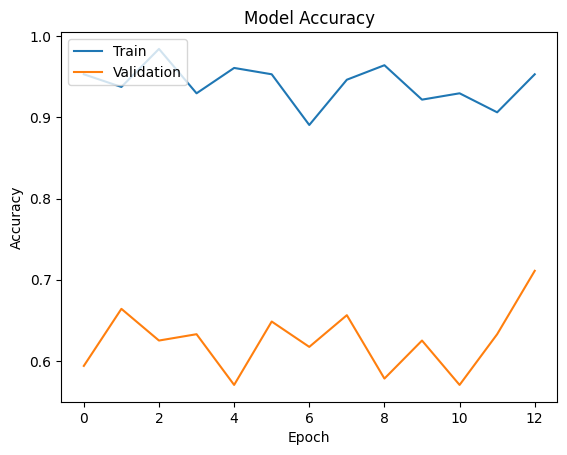

In [119]:
# Menampilkan plot akurasi pelatihan
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

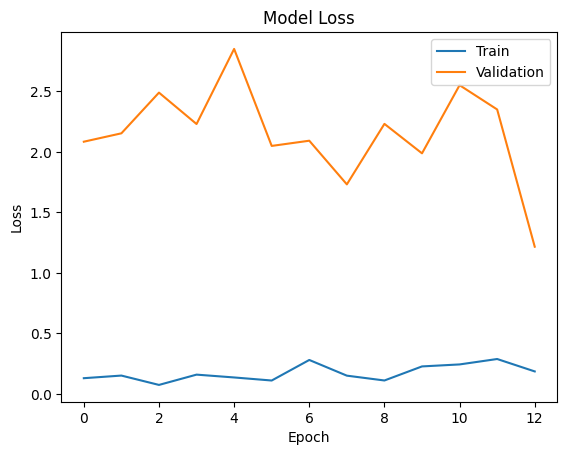

In [120]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

KLASIFIKASI KATEGORI 8 jenis barang
silahkan upload gambar SEPATU



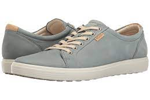

1/1 [==============================] - 0s 82ms/step
HASIL DETEKSINYA: 

Berhasil mengupload SEPATU


In [122]:
print("KLASIFIKASI KATEGORI 8 jenis barang")
inputan = input("Masukkan jenis kategori =  ").upper()
if inputan in ['LCD', 'MATRAS', 'TENDA', 'CAMERA', 'SEPATU', 'SPEAKER','PS','TAS']:
    print("silahkan upload gambar", inputan)
    print()

    # Terima input gambar dari user
    path = input("Masukkan path gambar: ")

    # Mengubah ukuran gambar sesuai dengan kebutuhan model
    img = Image.open(path).resize((150,100))

    # Menampilkan gambar yang di-upload
    display(img)

    # Mengubah gambar menjadi array
    x = np.array(img)
    # Menambahkan dimensi baru ke array
    x = np.expand_dims(x, axis=0)
    # Menggabungkan array menjadi stack
    images = np.vstack([x])

    # Melakukan prediksi dengan model
    classes = model.predict(images, batch_size=10)

    # Cek hasil prediksi
    print("HASIL DETEKSINYA: ")
    print()

    if classes[0][0] == 1:
        hasil = 'CAMERA'
    elif classes[0][1] == 1:
        hasil = 'LCD'
    elif classes[0][2] == 1:
        hasil = 'MATRAS'
    elif classes[0][3] == 1:
        hasil = 'PS'
    elif classes[0][4] == 1:
        hasil = 'SEPATU' 
    elif classes[0][5] == 1:
        hasil = 'SPEAKER' 
    elif classes[0][6] == 1:
        hasil = 'TAS'
    elif classes[0][7] == 1:
        hasil = 'TENDA'        
    else:
        print('Gambar SALAH')
        hasil = None

    if hasil is not None:
        if inputan == hasil:
            print("Berhasil mengupload", hasil)
        else:
            print("Gagal, gambar tersebut adalah", hasil, "bukan ", inputan)
else:
    print("kategori", inputan, "tidak tersedia")







#1 tes tas = Yes   
#2 tes speaker = YES  
#3 tes lcd = YES      
#4 tes matras= YES    
#5 tes ps = NO       
#6 tes sepatu = YES   
#7 tes tenda = YES
#8 tes CAMERA = NO   
      